In [27]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import json

curr_dir = sys.path[0]
path_file = os.path.join(curr_dir.split("ACN_data")[0], "paths.json")
assert os.path.exists(path_file), "Cannot find paths.json file, please specify out_dir"

with open(path_file, "r") as f:
    paths = json.load(f)
datasets_dir = paths["datasets"]
acn_data_dir = paths["acn_data"]
acn_data_dir = os.path.join(datasets_dir, acn_data_dir)
assert os.path.exists(acn_data_dir)

In [72]:
# helper functions

dt2hrs = lambda x: x.total_seconds()/3600
get_hr_in_day = lambda x: dt2hrs((x - x.floor("D")))
get_year = lambda x: x.year
# give a date, return the year and month in the format of YYYY-MM
get_YnM = lambda x: f"{str(x.year).zfill(4)}-{str(x.month).zfill(2)}"

## load files

In [ ]:
sites = ["caltech", "jpl", "office001"]
dfs = {
    site: pd.read_csv(os.path.join(acn_data_dir, f"acn_data_{site}.csv"), index_col=0)
    for site in sites
}
for site in sites:
    dfs[site]["connectionTime"] = pd.to_datetime(dfs[site]["connectionTime"], infer_datetime_format=True)
    dfs[site]["disconnectTime"] = pd.to_datetime(dfs[site]["disconnectTime"], infer_datetime_format=True)
    dfs[site]["doneChargingTime"] = pd.to_datetime(dfs[site]["doneChargingTime"], infer_datetime_format=True)
    # compute durations
    dfs[site]["totDuration"] = (dfs[site]["disconnectTime"] - dfs[site]["connectionTime"]).apply(dt2hrs)
    dfs[site]["chargingDuration"] = (dfs[site]["doneChargingTime"] - dfs[site]["connectionTime"]).apply(dt2hrs)
    dfs[site]["overstay"] = 1 - dfs[site]["chargingDuration"]/dfs[site]["totDuration"]
    dfs[site]["connect_hr_in_day"] = dfs[site]["connectionTime"].apply(get_hr_in_day)
dfs["all"] = pd.concat([dfs[site] for site in sites], axis=0)

## basic summary

In [25]:
dfs["caltech"].tail(5)

,userInputs,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,doneChargingTime,timezone,userID,totDuration,chargingDuration
_id,,,,,,,,,,,,,,
61550519f9af8b76960e169a,"[{'userID': 431, 'milesRequested': 100, 'WhPer...",2_39_89_25_2021-09-13 21:12:53.318460,2-39-89-25,CA-315,2,39,2021-09-13 14:12:53-07:00,2021-09-13 17:25:36-07:00,2.285,2021-09-13 14:41:31-07:00,America/Los_Angeles,431.0,0 days 03:12:43,0 days 00:28:38
61550519f9af8b76960e169b,"[{'userID': 6481, 'milesRequested': 25, 'WhPer...",2_39_123_23_2021-09-13 21:16:44.026068,2-39-123-23,CA-313,2,39,2021-09-13 14:17:04-07:00,2021-09-13 18:01:49-07:00,6.715,2021-09-13 16:18:07-07:00,America/Los_Angeles,6481.0,0 days 03:44:45,0 days 02:01:03
61550519f9af8b76960e169c,"[{'userID': 3905, 'milesRequested': 100, 'WhPe...",2_39_81_4550_2021-09-13 22:33:04.543952,2-39-81-4550,11900388,2,39,2021-09-13 15:33:07-07:00,2021-09-13 16:06:55-07:00,17.720,NaT,America/Los_Angeles,3905.0,0 days 00:33:48,NaT
61550519f9af8b76960e169d,"[{'userID': 1082, 'milesRequested': 20, 'WhPer...",2_39_91_437_2021-09-13 23:10:59.528292,2-39-91-437,CA-317,2,39,2021-09-13 16:11:12-07:00,2021-09-13 18:43:11-07:00,2.018,2021-09-13 17:13:35-07:00,America/Los_Angeles,1082.0,0 days 02:31:59,0 days 01:02:23
61550519f9af8b76960e169e,"[{'userID': 19055, 'milesRequested': 100, 'WhP...",2_39_81_4550_2021-09-14 01:52:31.129163,2-39-81-4550,11900388,2,39,2021-09-13 18:52:37-07:00,2021-09-13 20:05:10-07:00,45.064,NaT,America/Los_Angeles,19055.0,0 days 01:12:33,NaT


In [4]:
print(dfs["caltech"].columns)

Index(['userInputs', 'sessionID', 'stationID', 'spaceID', 'siteID',
       'clusterID', 'connectionTime', 'disconnectTime', 'kWhDelivered',
       'doneChargingTime', 'timezone', 'userID'],
      dtype='object')


In [8]:
for site in dfs:
    print(f"{site:<10}: {len(dfs[site]):>6} records.", end=" ")
    start = dfs[site].connectionTime.min().date()
    end = dfs[site].disconnectTime.max().date()
    print(f"  start={start}, end={end}")

caltech   :  31424 records.   start=2018-04-25, end=2021-09-13
jpl       :  33638 records.   start=2018-09-05, end=2021-09-14
office001 :   1683 records.   start=2019-03-25, end=2021-09-13
all       :  66745 records.   start=2018-04-25, end=2021-09-14


In [76]:
for site in dfs:
    df = dfs[site]
    print(f"{site:<10}: ", end=" ")
    for year in range(2018, 2022):
        n = len(df[df["connectionTime"].apply(get_year) == year])
        print(f"[{str(year)[2:]}]: {n:>5}", end=" ")
    print()    

caltech   :  [18]: 15299 [19]: 10616 [20]:  2475 [21]:  3034 
jpl       :  [18]:  4775 [19]: 17413 [20]:  5574 [21]:  5876 
office001 :  [18]:     0 [19]:   922 [20]:   436 [21]:   325 
all       :  [18]: 20074 [19]: 28951 [20]:  8485 [21]:  9235 


In [9]:
for site in dfs:
    df = dfs[site]
    num_stations = df.stationID.nunique()
    num_spaces = df.spaceID.nunique()
    num_clusters = df.clusterID.nunique()
    num_users = df.userID.nunique()
    print(f"{site:<10}: {num_stations:>4} stations, {num_spaces:>4} spaces, {num_clusters:>4} clusters, {num_users:>4} users")

caltech   :   55 stations,   55 spaces,    1 clusters,  571 users
jpl       :   52 stations,   52 spaces,    1 clusters,  522 users
office001 :    8 stations,    8 spaces,    1 clusters,   22 users
all       :  115 stations,  115 spaces,    3 clusters, 1028 users


## by weekday

In [70]:
# give a date, return its weekday (M, Tu, W, Th, F, Sa, Su as 0-6)
get_weekday = lambda x: x.weekday()
get_workday = lambda x: x.weekday() < 5

gp_workday = {}
for site in sites:
    df = dfs[site]
    workday = df.connectionTime.apply(get_workday)
    gp_workday[site] = df.groupby(workday)

    n_work = sum(workday)
    n_wend = len(workday) - n_work

    print(f"{site:<10}: workday: weekend = {n_work:>5}:{n_wend:>4} = {n_work/n_wend*2:>6.2f}:2")

caltech   : workday: weekend = 26616:4808 =  11.07:2
jpl       : workday: weekend = 32753: 885 =  74.02:2
office001 : workday: weekend =  1676:   7 = 478.86:2


Text(0, 0.5, 'Weekend')

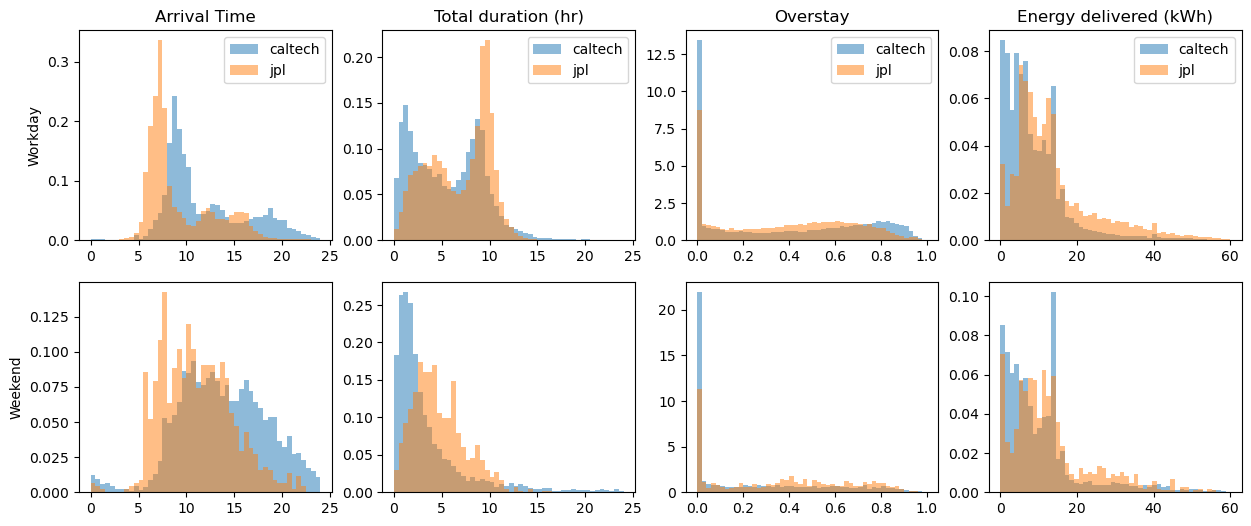

In [65]:
fig, axs = plt.subplots(2, 4, figsize=(15, 6))
def plot_hist_by_workday(var, title, axs):
    if var in ["totDuration", "overstay", "connect_hr_in_day", "kWhDelivered"]:
        ops = lambda x: x
    elif var in ["connectionTime", "disconnectTime"]:
        ops = get_hr_in_day
    else:
        raise ValueError(f"Unknown var: {var}")

    if var in ["totDuration", "connectionTime", "disconnectTime", "connect_hr_in_day"]:
        lim, bins = (0, 24), 48
    elif var in ["overstay"]:
        lim, bins = (0, 1), 50
    elif var in ["kWhDelivered"]:
        lim, bins = (0, 60), 50

    ax = axs[0]    
    for site in sites:
        if site == "office001":
            continue
        df = gp_workday[site].get_group(True)
        ax.hist(df[var].apply(ops), density=True, alpha=0.5, label=site, range=lim, bins=bins)
    ax.legend()
    ax.set_title(title)
    
    ax = axs[1]    
    for site in sites:
        if site == "office001":
            continue
        df = gp_workday[site].get_group(False)
        ax.hist(df[var].apply(ops), density=True, alpha=0.5, label=site, range=lim, bins=bins)
    

plot_hist_by_workday("connect_hr_in_day", "Arrival Time", axs[:, 0])
plot_hist_by_workday("totDuration", "Total duration (hr)", axs[:, 1])
plot_hist_by_workday("overstay", "Overstay", axs[:, 2])
plot_hist_by_workday("kWhDelivered", "Energy delivered (kWh)", axs[:, 3])

axs[0,0].set_ylabel("Workday")
axs[1,0].set_ylabel("Weekend")

## by month

In [14]:
gp_YnM = {}
for site in sites:
    df = dfs[site]
    YnM = df.connectionTime.apply(get_YnM)
    gp_YnM[site] = df.groupby(YnM)

<Axes: title={'center': 'Number of sessions per month'}, xlabel='month'>

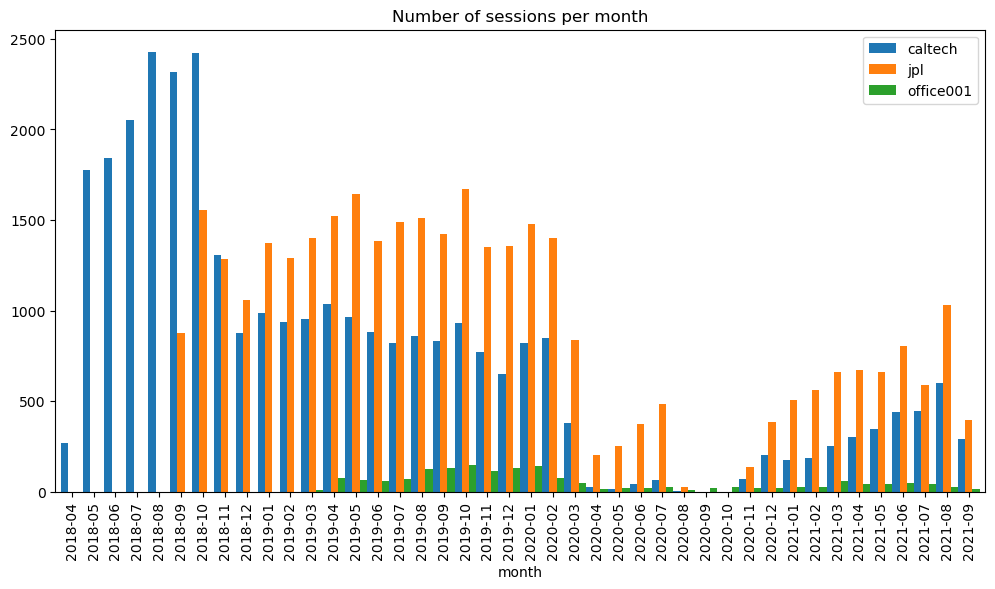

In [23]:
# count the number of sessions every month
YnM_count = {}
for site in gp_YnM:
    YnM_count[site] = gp_YnM[site].size()
YnM_count = pd.DataFrame(YnM_count)

YnM_count.plot(kind="bar", width=1, figsize=(12, 6), title="Number of sessions per month", xlabel="month")

## save sample files

In [ ]:
# sample
sample_month  = "2019-04"
for site in sites:
    df = dfs[site]
    YnM = df["connectionTime"].apply(get_YnM)
    sample_df = df.loc[YnM == sample_month]
    # sample_df.to_csv(os.path.join("sample", f"acn_data_{site}_{sample_month}.csv"), index=True)
    # print(f"{site:<10} sample data saved: {len(sample_df):>5} records")

caltech    sample data saved:  1035 records
jpl        sample data saved:  1524 records
office001  sample data saved:    74 records
